In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Load master tables

plays = pd.read_csv('game_plays.csv')
player_plays = pd.read_csv('game_plays_players.csv')

In [3]:
#Join master tables

player_plays = player_plays[['play_id','player_id','playerType']]
joined = plays.join(player_plays.set_index('play_id'), on='play_id')
pd.set_option('display.max_columns',None)
display(joined.head())

,play_id,game_id,play_num,team_id_for,team_id_against,event,secondaryType,x,y,period,periodType,periodTime,periodTimeRemaining,dateTime,goals_away,goals_home,description,st_x,st_y,rink_side,player_id,playerType
0,2011030221_1,2011030221,1,NaN,NaN,Game Scheduled,NaN,NaN,NaN,1,REGULAR,0,1200,2012-04-29 18:16:06,0,0,Game Scheduled,NaN,NaN,NaN,NaN,NaN
1,2011030221_2,2011030221,2,NaN,NaN,Period Ready,NaN,NaN,NaN,1,REGULAR,0,1200,2012-04-29 19:19:49,0,0,Period Ready,NaN,NaN,NaN,NaN,NaN
2,2011030221_3,2011030221,3,NaN,NaN,Period Start,NaN,NaN,NaN,1,REGULAR,0,1200,2012-04-29 19:20:13,0,0,Period Start,NaN,NaN,NaN,NaN,NaN
3,2011030221_4,2011030221,4,4.0,1.0,Faceoff,NaN,0.0,0.0,1,REGULAR,0,1200,2012-04-29 19:20:13,0,0,Sean Couturier faceoff won against Patrik Elias,0.0,0.0,right,8476461.0,Winner
3,2011030221_4,2011030221,4,4.0,1.0,Faceoff,NaN,0.0,0.0,1,REGULAR,0,1200,2012-04-29 19:20:13,0,0,Sean Couturier faceoff won against Patrik Elias,0.0,0.0,right,8460542.0,Loser


In [4]:
#Create goal/shot sub-master tables

goal = joined.copy().loc[joined['event']=='Goal']
goal = goal.copy().loc[goal['playerType']=='Scorer']
shot = joined.copy().loc[joined['event']=='Shot']
shot = shot.copy().loc[shot['playerType']=='Shooter']

In [5]:
#Create ovi/sid sub-masters, then ovi/sid goal/shot tables

ovi_id = 8471214
sid_id = 8471675

ovi = joined.copy().loc[joined['player_id']==ovi_id]
ovi['name'] = 'Ovechkin'
sid = joined.copy().loc[joined['player_id']==sid_id]
sid['name'] = 'Crosby'

ovi_goals = ovi.copy().loc[ovi['event']=='Goal']
ovi_goals = ovi_goals.copy().loc[ovi_goals['playerType']=='Scorer']
sid_goals = sid.copy().loc[sid['event']=='Goal']
sid_goals = sid_goals.copy().loc[sid_goals['playerType']=='Scorer']

combined_goals = pd.concat([ovi_goals,sid_goals])

ovi_shots = shot.copy().loc[shot['player_id']==ovi_id]
ovi_shots = ovi_shots.copy().loc[ovi_shots['playerType']=='Shooter']
sid_shots = shot.copy().loc[shot['player_id']==sid_id]
sid_shots = sid_shots.copy().loc[sid_shots['playerType']=='Shooter']

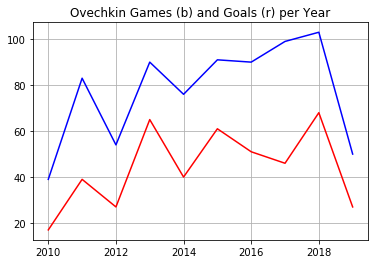

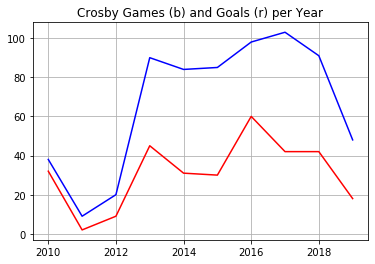

In [6]:
#Track Games and Goals per Calendar Year

%matplotlib inline

#Ovi Goals Over Time
o_got = ovi_goals.filter(['dateTime','play_id'],axis=1)
o_got['dateTime'] = pd.to_datetime(o_got['dateTime'])
o_got = o_got.set_index('dateTime')
o_got = o_got.resample("Y").count()
years = [2010,2011,2012,2013,2014,2015,2016,2017,2018,2019]
o_got.index = years

#Ovi Games Per Year
o_gpy = ovi.filter(['dateTime','game_id'],axis=1)
o_gpy['dateTime'] = pd.to_datetime(o_gpy['dateTime'])
o_gpy = o_gpy.set_index('dateTime')
o_gpy = o_gpy.resample("Y").nunique()
o_gpy.index = years

#Sid Goals Over Time
s_got = sid_goals.filter(['dateTime','play_id'],axis=1)
s_got['dateTime'] = pd.to_datetime(s_got['dateTime'])
s_got = s_got.set_index('dateTime')
s_got = s_got.resample("Y").count()
s_got.index = years

#Ovi Games Per Year
s_gpy = sid.filter(['dateTime','game_id'],axis=1)
s_gpy['dateTime'] = pd.to_datetime(s_gpy['dateTime'])
s_gpy = s_gpy.set_index('dateTime')
s_gpy = s_gpy.resample("Y").nunique()
s_gpy.index = years

#Plot Ovi
plt.plot(o_got.index,o_got.play_id,color='r')
plt.plot(o_gpy.index,o_gpy.game_id,color='b')
plt.title('Ovechkin Games (b) and Goals (r) per Year')
plt.grid()
plt.show()

#Plot Sid
plt.plot(s_got.index,s_got.play_id,color='r')
plt.plot(s_gpy.index,s_gpy.game_id,color='b')
plt.title('Crosby Games (b) and Goals (r) per Year')
plt.grid()
plt.show()


Ovi Goals:
Wrist Shot    175
Slap Shot     128
Snap Shot      83
Backhand       30
Tip-In         17
Deflected       7
Name: secondaryType, dtype: int64

Sid Goals:
Wrist Shot     137
Snap Shot       56
Backhand        48
Tip-In          42
Slap Shot       18
Deflected        6
Wrap-around      4
Name: secondaryType, dtype: int64


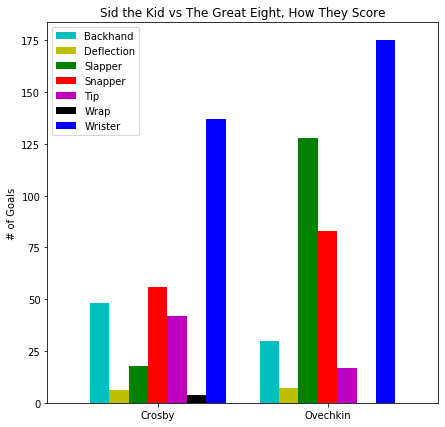

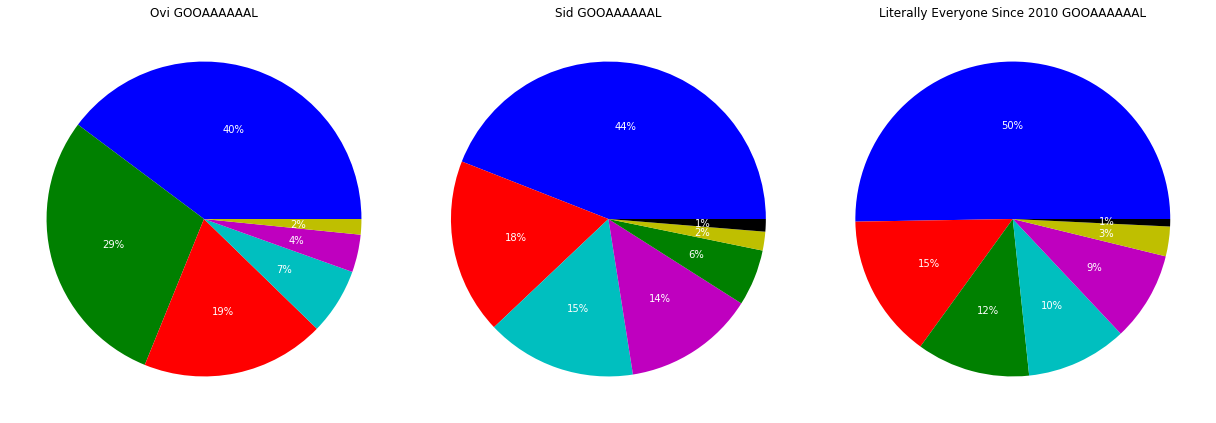

In [7]:
#What kind of shot do they score with

#Numbers
print('Ovi Goals:')
print(ovi_goals['secondaryType'].value_counts())
print('\nSid Goals:')
print(sid_goals['secondaryType'].value_counts())

#NESTED BAR GRAPH
combined_goals_type = combined_goals.groupby('name')['secondaryType'].value_counts()
combined_goals_type = combined_goals_type.unstack(level='secondaryType')
combined_goals_type.plot(kind='bar',legend=True,figsize=(7,7),width=.8,color='cygrmkb')
plt.title('Sid the Kid vs The Great Eight, How They Score')
plt.legend(['Backhand','Deflection','Slapper','Snapper','Tip','Wrap','Wrister'])
plt.xlabel('')
plt.ylabel('# of Goals')
plt.xticks(rotation=0)
plt.show()

#PIES
ovi_goal_type = pd.DataFrame(ovi_goals['secondaryType'].value_counts())
sid_goal_type = pd.DataFrame(sid_goals['secondaryType'].value_counts())
nhl_goal_type = pd.DataFrame(goal['secondaryType'].value_counts())

ovi_goal_type.rename(columns={'secondaryType':''},inplace=True)
sid_goal_type.rename(columns={'secondaryType':''},inplace=True)

fig, axs = plt.subplots(ncols=3,sharey=False)
ovi_goal_type.plot.pie(y='',legend=False,labels=None,ax=axs[0],figsize=(17,17),autopct='%1.0f%%',colors='bgrcmyk',textprops={'color':"w"}).set_title('Ovi GOOAAAAAAL')
sid_goal_type.plot.pie(y='',legend=False,labels=None,ax=axs[1],figsize=(17,17),autopct='%1.0f%%',colors='brcmgyk',textprops={'color':"w"}).set_title('Sid GOOAAAAAAL')
nhl_goal_type.plot.pie(y='secondaryType',legend=False,labels=None,ax=axs[2],figsize=(17,17),autopct='%1.0f%%',colors='brgcmyk',textprops={'color':"w"}).set_title('Literally Everyone Since 2010 GOOAAAAAAL')
plt.ylabel('')
plt.tight_layout()
plt.show()


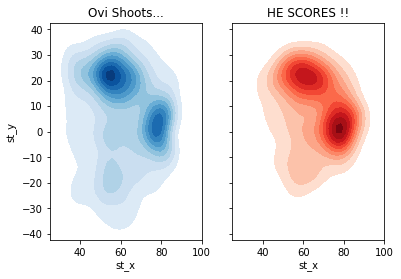

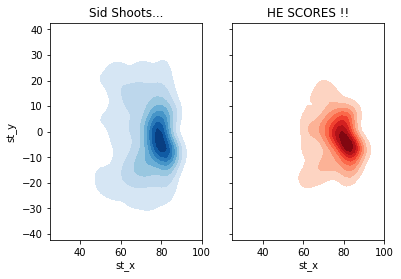

Note - the net is at (89,0).


In [8]:
#KDE shots next to goals

#Ovi
fig, axs = plt.subplots(ncols=2,sharex=True,sharey=True)
sns.kdeplot(data=ovi_shots['st_x'],data2=ovi_shots['st_y'],cmap="Blues",shade=True,shade_lowest=False,ax=axs[0]).set_title('Ovi Shoots...')
sns.kdeplot(data=ovi_goals['st_x'],data2=ovi_goals['st_y'],cmap="Reds",shade=True,shade_lowest=False,ax=axs[1]).set_title('HE SCORES !!')
plt.xlim(left=25,right=100)
plt.ylim(top=42.5,bottom=-42.5)
plt.ylabel('')
plt.show()

#Sid
fig, axs = plt.subplots(ncols=2,sharex=True,sharey=True)
sns.kdeplot(data=sid_shots['st_x'],data2=sid_shots['st_y'],cmap="Blues",shade=True,shade_lowest=False,ax=axs[0]).set_title('Sid Shoots...')
sns.kdeplot(data=sid_goals['st_x'],data2=sid_goals['st_y'],cmap="Reds",shade=True,shade_lowest=False,ax=axs[1]).set_title('HE SCORES !!')
plt.xlim(left=25,right=100)
plt.ylim(top=42.5,bottom=-42.5)
plt.ylabel('')
plt.show()

print('Note - the net is at (89,0).')